## load a local picture

In [2]:
%cd ./pic segmentation

D:\codes\jupyter_prj\pic segmentation


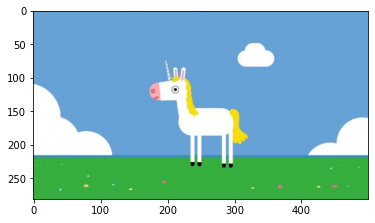

In [7]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os
from scipy.ndimage import gaussian_filter
from extractFeature import *

PROJECT_ROOT_DIR = '.'
filename = 'unicorn.jpg'
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
image = imread(os.path.join(images_path, filename))

image.shape

plt.imshow(image)

## preprocess

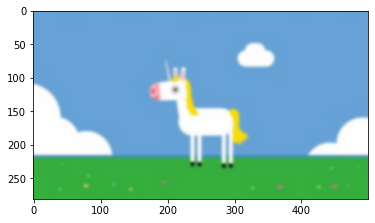

In [24]:
sigma = 2
filtered_img = gaussian_filter(image, sigma=(sigma, sigma,0))
plt.imshow(filtered_img)

In [46]:
feature = norm_and_extract_features(filtered_img, rgb_weight= 0.7)
feature.shape


(140500, 5)

## using GMM clustering on feature space

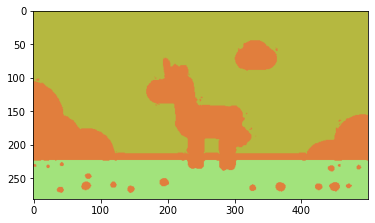

In [45]:
k = 3 # number of segmentations.

from sklearn.mixture import GaussianMixture

random_label_color = np.random.randint(256,size=(k,3))
gs = GaussianMixture(n_components=k, random_state=42).fit(feature)
# model.predict predicts the index of aligned component for each pixel
r_pred = gs.predict(feature)
# model.means_ is the mean of the components
pic = random_label_color[r_pred]
pic = pic.reshape(image.shape)
plt.imshow(pic)

## try different number of components

In [8]:
segmented_imgs = []
n_components = (10, 8, 6, 4, 2)
for n_comp in n_components:
    gs = GaussianMixture(n_comp, random_state=42).fit(X)
    pred_idx = gs.predict(X)
    segmented_img = gs.means_[pred_idx]
    segmented_imgs.append(segmented_img.reshape(image.shape))

NameError: name 'n_colors' is not defined

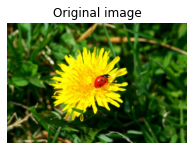

In [9]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_components):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()